In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Watts y Strogatz parten de una red regular similar a la que generamos en las primeras sesiones prácticas. Le llamamos red anillo y tiene la característica de que su coeficiente de clustering es constante e independiente de $N$. Mediante esa estructura se puede generar una red tan grande como quiera.

## Función anillo
En la siguiente celda puedes decidir la cantidad de nodos adyacentes en el anillo con los que cada nodo estará conectado. Se necesita que estén conectados, como mínimo, a segundos vecinos para que el coeficiente de clustering sea distinto de cero. Juega con esa variable descomentando las líneas (o generando nuevas) y con el número de nodos de la red para ver cómo se comporta el coeficiente de clustering de los nodos.

Notar que se modificó un poco la definición de la red anillo, introduciendo un segundo parámetro (```l```) para determinar con cuántos "l-vecinos" estará conectado cada nodo.


In [9]:


#Red Anillo regular

def Anillo(N, l = 2):
    nodos = np.arange(N)
    G = nx.Graph()
    G.add_nodes_from( nodos )
    
    for i in range(l):
        G.add_edges_from( zip( nodos, np.roll(nodos, i+1) ) )
    return G

el coeficiente de clustering de la red es :  0.5


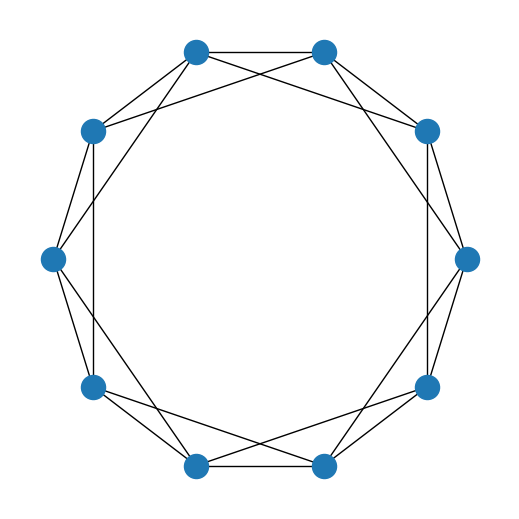

In [10]:
# juega con ambos parámetros para ver la estructura y el coeficiente de clustering
G = Anillo(10, 2) #
print('el coeficiente de clustering de la red es : ', nx.clustering(G)[0])
plt.figure(figsize = [5,5])
nx.draw_circular(G)


In [11]:
nx.diameter(G)

3

Ahora se presenta la misma red pero se distingue al primer nodo añadido, sólo con la intención de que lo distingan y lo utilicen como referencia cuando la red empiece a ser modificada. Ese es el nodo 0. En la siguiente celda también se calcula el diámetro de la red. Hasta ahora, como pueden verificarlo, el diámetro de la red es una función lineal del tamaño de los nodos; no tiene, en absoluto, la propiedad de mundo pequeño.

¿Cómo se relaciona el diámetro con la definición de la red, es decir, si los nodos se conectan a segundos, terceros, cuartos, etc., vecinos?

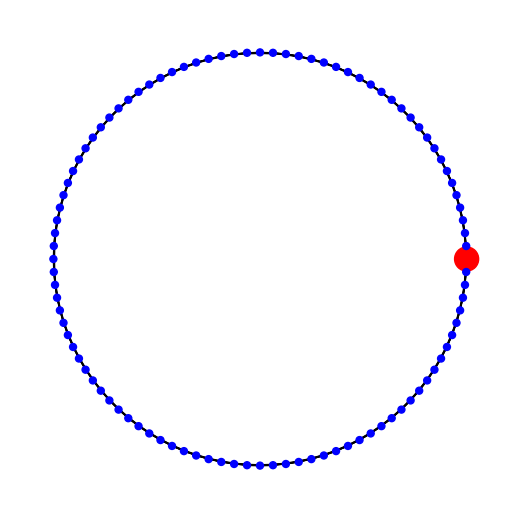

Clustering =  0.600000000000001
Diametro =  17


In [12]:
G = Anillo(100,3)

N = len(G)
tamanos = [300]
tamanos = tamanos + (N-1)*[25]
colores = ['red']
colores = colores + (N-1)*['blue']

plt.figure(figsize = [5,5])
nx.draw_circular(G, node_size = tamanos, node_color = colores)
plt.show()

print('Clustering = ', nx.average_clustering(G) ) 
print('Diametro = ', nx.diameter(G) ) 

## Matriz de distancia, distancia promedio y diámetro
Ahora, para visualizar el comportamiento de las distancias entre cualquier pareja de nodos, utilizamos una representación gráfica (mediante ```imshow```) de la matriz de distancias entre nodos.
Para ello se genera una matriz cuadrada de $N \times N$ y se asigna a cada entrada $(i,j)$ la distancia $d_{ij}$ entre los nodos $(i,j)$.

Después, mediante el uso de la función ```plt.subplots``` se visualizan la matriz de adyacencia y la red juntas. Utilicen esta representación para comprender la estructura de la matriz de distancias y cómo se relacionan el diámetro y la distancia promedio.

In [13]:
# Matriz de distancias y distancias caracteristicas

MatD0 = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        MatD0[i,j] = nx.shortest_path_length(G, i, j)
dmin = np.min(MatD0)
dmax = np.max(MatD0)

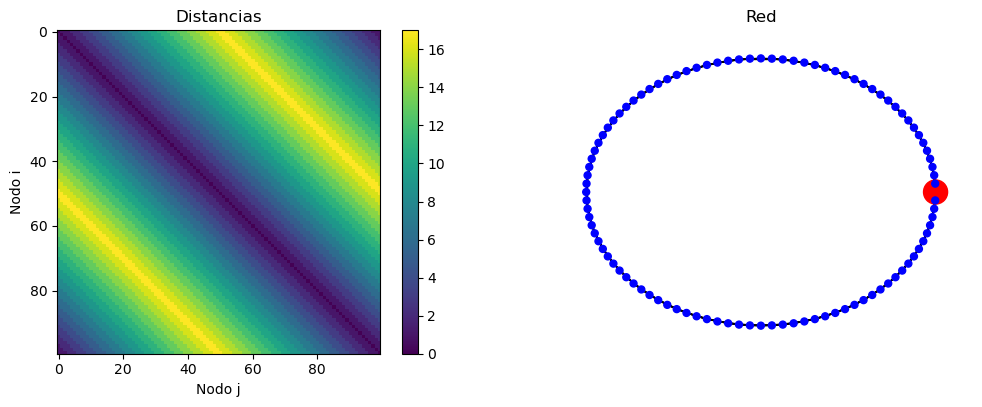

Distancia máxima entre nodos (diámetro): 	 17.0
Distancia promedio entre nodos: 		 8.67
Coeficiente de clustering promedio de la red: 	 0.600000000000001


In [14]:
h = .6 #parametro para jugar con el tamaño de la imagen
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20*h,7*h)) 
nx.draw_circular(G, node_size = tamanos, node_color = colores, ax = ax2)


pos = ax1.imshow(MatD0, vmin=dmin, vmax=dmax)
fig.colorbar(pos, ax=ax1)

ax1.set_title('Distancias')
ax1.set_xlabel('Nodo j')
ax1.set_ylabel('Nodo i')

ax2.set_title('Red')
plt.show()

print('Distancia máxima entre nodos (diámetro): \t', np.max(MatD0))
print('Distancia promedio entre nodos: \t\t', np.mean(MatD0))
print('Coeficiente de clustering promedio de la red: \t', nx.average_clustering(G))


## Función cambio de enlaces
La idea principal de Watts y Strogatz fue reducir la distancia entre todas las parejas de nodos cambiando de forma aleatoria enlaces. Esto generaría "puentes" entre enlaces que originalmente están lejanos pero que podrían modificar la estructura completa de las distancias. Veamos esto con detalle.

Primero hay que definir una red ```cambio_enlace``` que hace lo siguiente:
- selecciona un nodo aleatorio de la red mediante la función ```np.random.choice``` que toma un objeto iterable y regresa un elemento al azar. 
- selecciona un nodo entre los vecinos del primer nodo.
- remueve el enlace entre esos dos nodos
- de los nodos restantes, elije uno al azar. Para esto se utiliza la estructura de conjuntos en python. Los conjuntos pueden restarse para sacar los elementos de un conjunto de entre los elementos de otro. Aquí se toma el conjunto de los nodos de G mediante ```set(G)``` y se le quitan dos conjuntos: el conjunto de los vecinos del nodo original, mediante ```set(G[nodo1])``` y el conjunto cuyo único elemento es el nodo original ```set([nodo1])```.
- se establece el nuevo enlace entre el nodo original y el nuevo nodo.

In [15]:
def cambio_enlace(G):
  # ojo con el uso de los conjutos (set)
  nodo1 = np.random.choice(G)
  nodo2 = np.random.choice( G[nodo1] )
  G.remove_edge(nodo1, nodo2)
  seleccion = set(G) - set(G[nodo1]) - set([nodo1])
  
  nuevo_nodo = np.random.choice( list(seleccion) )
  
  G.add_edge(nodo1, nuevo_nodo)


Para aplicarlo a una red y luego comparar las modificaciones, se genera una red y su copia, y se le aplica el reenlace y se visualizan la red y la matriz de distancias.
- Genera una red anillo con los parámetros que elijas.
- Luego corre la casilla que dice "Modificación de la red". Esa casilla puedes correrla muchas veces para ver qué ocurre con la red y con la matriz si se modifican uno, dos, tres, cuatro, etc., enlaces. 
- Para reiniciar debes volver a correr la casilla que dice "Generar redes"

Algunas preguntas para orientar la observación:
- ¿Por qué la primera modificación del enlace no disminuye el diámetro?
- ¿Qué característica tienen los nuevos enlaces que disminuyen más la distancia promedio?
- ¿Qué característica tienen los nuevos enlaces que casi no disminuyen la distancia promedio?
- ¿Cuántos cambios de enlace debes realizar para que el coeficiente de clustering disminuya a la mitad? ¿Qué pasó en ese caso con la distancia promedio y el diámetro?

In [16]:
# Generar redes
N = 100
l = 3

G = Anillo(N, l)

G2 = G.copy()

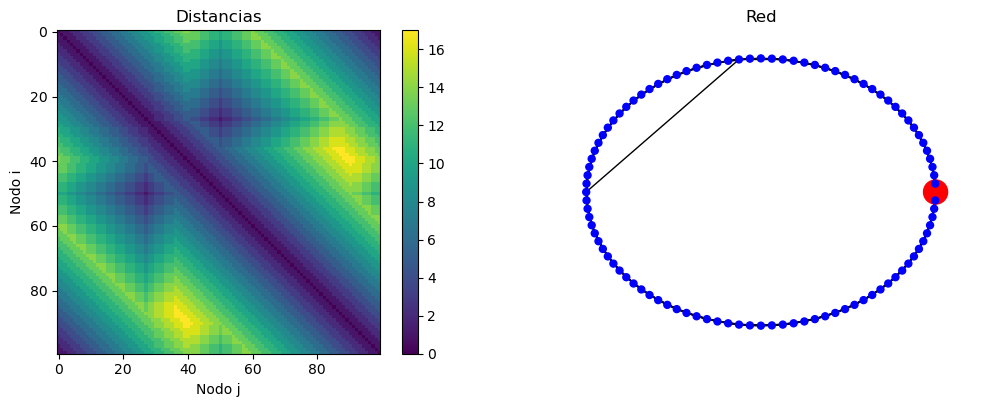

Diametro: 		 17.0 --> 17.0
Distancia media: 	 8.67 --> 7.6338
Clustering: 		 0.600000000000001 --> 0.5966190476190485


In [17]:
# Modificación de la red

cambio_enlace(G2)

MatD = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        MatD[i,j] = nx.shortest_path_length(G2, i, j)

        
        
h = .6

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20*h,7*h)) 
nx.draw_circular(G2, node_size = tamanos, node_color = colores, ax = ax2)


#fig, ax = plt.subplots(figsize = (10*h,7*h)) 
pos = ax1.imshow(MatD, vmin=dmin, vmax=dmax)
fig.colorbar(pos, ax=ax1)
ax1.set_title('Distancias')
ax1.set_xlabel('Nodo j')
ax1.set_ylabel('Nodo i')

ax2.set_title('Red')

plt.show()
print('Diametro: \t\t', np.max(MatD0), '-->',np.max(MatD))
print('Distancia media: \t', np.mean(MatD0), '-->', np.mean(MatD))
print('Clustering: \t\t', nx.average_clustering(G), '-->', nx.average_clustering(G2))


Para responder a las preguntas anteriores se puede hacer el proceso de forma más sistemática si se usa un bucle para aplicar la función varias veces. Juega con eso en la siguiente casilla. Como puedes ver, el bucle sólo toma cinco líneas, el resto son instrucciones para la visualización y comparación de las redes y las matrices, inciales y finales.

### Varias veces

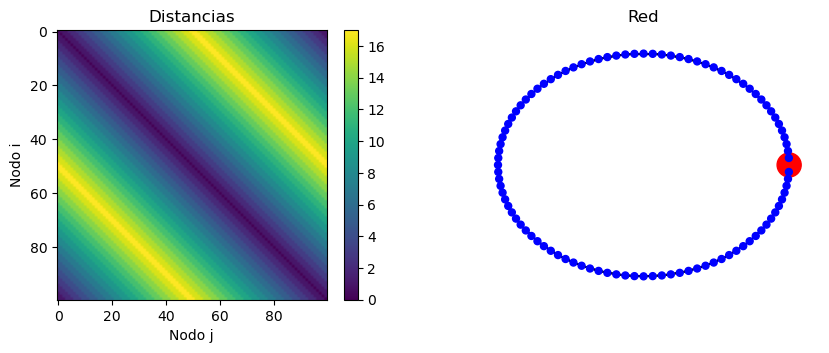

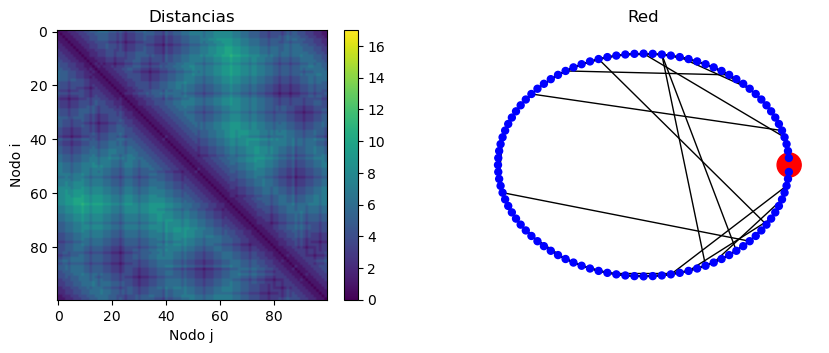

Diametro:  17.0 --> 11.0
Distancia media:  8.67 --> 4.6876
Clustering:  0.600000000000001 --> 0.5297619047619051


In [18]:
G2 = G.copy()

veces = 15

for k in range(veces):
    cambio_enlace(G2)


MatD = np.zeros([N,N])

for i in range(N):
    for j in range(N):
        MatD[i,j] = nx.shortest_path_length(G2, i, j)

        
        
h = .5

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20*h,7*h)) 
nx.draw_circular(G, node_size = tamanos, node_color = colores, ax = ax2)


#fig, ax = plt.subplots(figsize = (10*h,7*h)) 
pos = ax1.imshow(MatD0, vmin=dmin, vmax=dmax)
fig.colorbar(pos, ax=ax1)

ax1.set_title('Distancias')
ax1.set_xlabel('Nodo j')
ax1.set_ylabel('Nodo i')

ax2.set_title('Red')
plt.show()


fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20*h,7*h)) 
nx.draw_circular(G2, node_size = tamanos, node_color = colores, ax = ax2)


#fig, ax = plt.subplots(figsize = (10*h,7*h)) 
pos = ax1.imshow(MatD, vmin=dmin, vmax=dmax)
fig.colorbar(pos, ax=ax1)
ax1.set_title('Distancias')
ax1.set_xlabel('Nodo j')
ax1.set_ylabel('Nodo i')

ax2.set_title('Red')

plt.show()
print('Diametro: ', np.max(MatD0), '-->',np.max(MatD))
print('Distancia media: ', np.mean(MatD0), '-->', np.mean(MatD))
print('Clustering: ', nx.average_clustering(G), '-->', nx.average_clustering(G2))

### Comportamiento de diámetro, distancia media y clustering

Como ejercicio. Genera ahora unas gráficas de diámetro, distancia media y clustering en función del número de enlaces que se modificaron en la red. Lo que se quiere es visualizar cuál disminuye más rápido, y qué tan rápido.

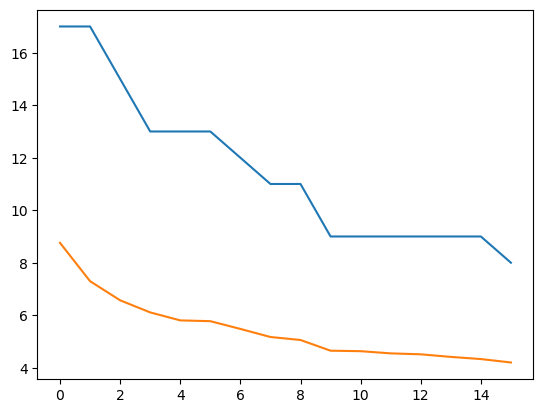

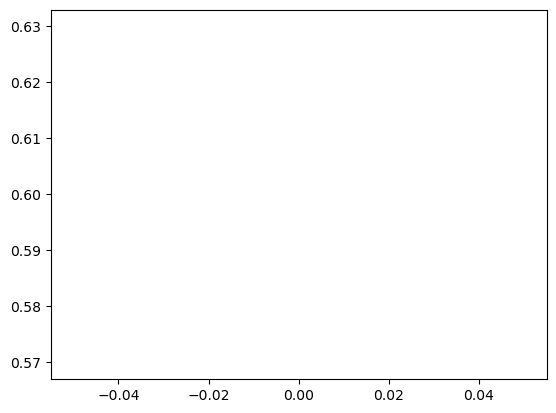

In [19]:
#Genera la red y su matriz de distancias
#### INICIO EJERCICIO

N = 100
l = 3

G = Anillo(N,l)

G2 = G.copy()
#### FINAL  EJERCICIO      
# Generar una lista para cada variable. El primer elemento de cada lista es el valor inicial del diámetro
# la distancia promedio y el coeficiente de clustering promedio de la red.

Diam = [nx.diameter(G2)]
Dist = [nx.average_shortest_path_length(G2)]
Clus = [nx.average_clustering(G2)]



# Aplica la fucnión cambio_enlace varias veces (define cuantas veces), y cada vez que lo apliques, calcula los nuevos valores 
# y agrégalos a la lista usando lista.append(valor). Para ello haz un bucle usando k

k =  15

for i in range(k):
    ### INICIO EJERCICIO
    # aplica la funcion
    cambio_enlace(G2)
    # agrega los valores
    Diam.append(nx.diameter(G2))
    Dist.append(nx.average_shortest_path_length(G2))
    ...
    ### FINAL EJERCICIO
    

    # Las siguientes líneas hacen una gráfica simple de las listas de valores generados. 
# El diámetro y la distancia promedio se grafican juntas, el clustering aparte.
plt.plot(Diam)
plt.plot(Dist)
plt.show()


plt.plot(Clus)
plt.show()

¿Qué puedes decir respecto al comportamiento de las distancias y el clustering? ¿Cómo decaen? ¿Cuál decae más rápido?


Para disminuir las fluctuaciones, puedes hacer varias corridas, guardar toda la información de cada corrida y al final promediarlo. A continuación se les proporciona el inicio y el final del proceso, en medio deben rellenar con el procedimiento que hicieron antes:

(se les recomiendan 15 corridas, para que no tarde tanto)

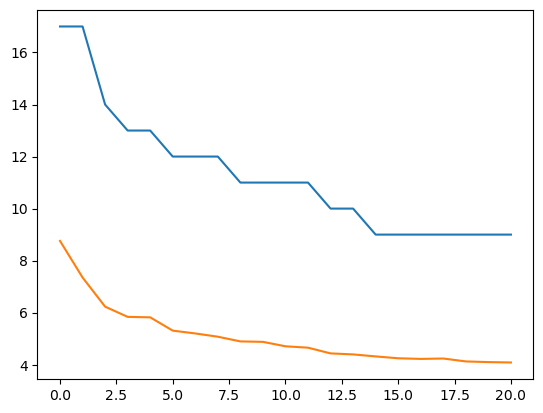

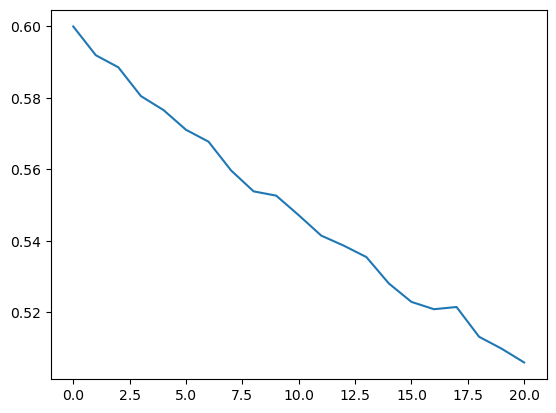

In [20]:
# Se generan las listas donde se introducirán las listas de los valores de cada corrida.
N = 100
l = 3

G = Anillo(N,l)


DIAM = []
DIST = []
CLUS = []

corridas = 10

for l in range(corridas):
    #### INICIO EJERCICIO Haz lo mismo que hiciste en la casilla anterior, pero ahora dentro de este bucle
    G2 = G.copy()
    

    Diam = [nx.diameter(G2)]
    Dist = [nx.average_shortest_path_length(G2)]
    Clus = [nx.average_clustering(G2)]
    
    k = 20 # numero de cambio de enlaces
    for i in range(k):
        cambio_enlace(G2)
        Diam.append(nx.diameter(G2))
        Dist.append(nx.average_shortest_path_length(G2))
        Clus.append(nx.average_clustering(G2))
    #### FINAL EJERCICIO
    
    #las siguientes line agregan la información de cada corrida a una lista
    DIAM.append(Diam)
    DIST.append(Dist)
    CLUS.append(Clus)
  

plt.plot(Diam)
plt.plot(Dist)
plt.show()
plt.plot(Clus)
plt.show()

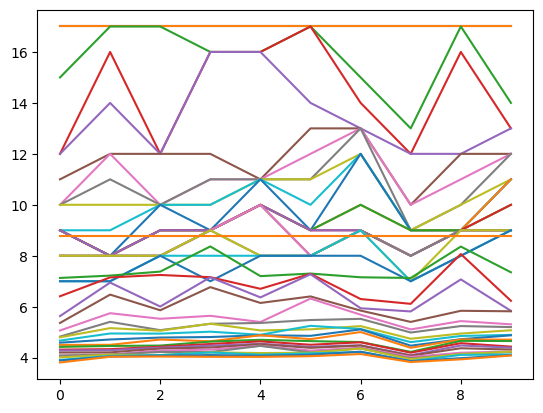

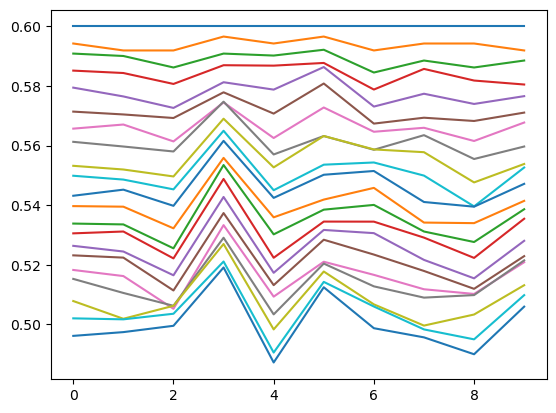

In [21]:
plt.plot(DIAM)
plt.plot(DIST)
plt.show()
plt.plot(CLUS)
plt.show()

Mediante la función de numpy ```np.mean()``` aclarando el eje sobre el que aplicaremos el promedio, se hace el promedio sobre todas las corridas de los valores correspondientes a cada entrada de las listas. Dicho de otro modo, se obtiene el promedio de todas las corridas para el valor cada vez que aplicamos la función de cambio de enlace

In [22]:

Y1 = np.mean(np.array(DIAM), axis = 0)
Y2 = np.mean(np.array(DIST), axis = 0)
Y3 = np.mean(np.array(CLUS), axis = 0)

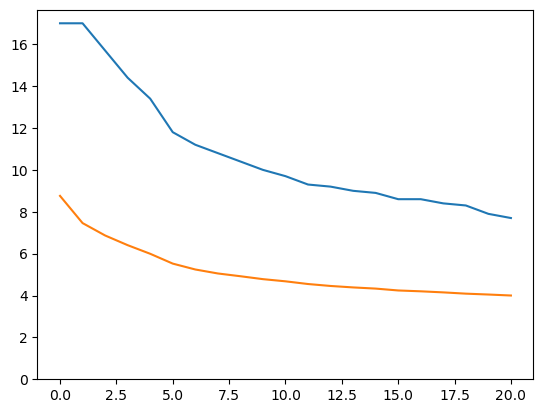

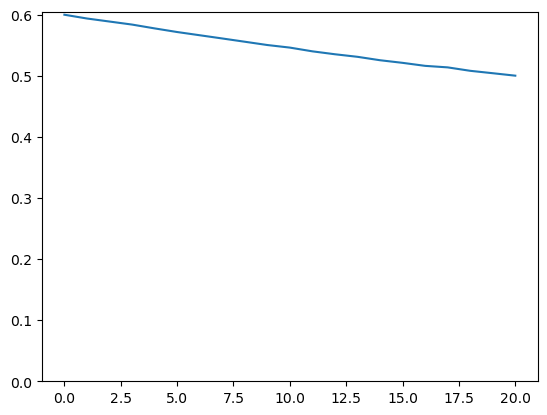

In [23]:
plt.plot(Y1)
plt.plot(Y2)
plt.ylim([0,None])
plt.show()

plt.plot(Y3)
plt.ylim([0,None])
plt.show()

De nuevo. ¿Qué puedes decir respecto al comportamiento de las distancias y el clustering? ¿Cómo decaen? ¿Cuál decae más rápido?

## El "experimento" de Watts-Strogatz

Ahora que se ha generado un poco de intuición, se genera una nueva función más apegada a la propuesta de Watts y Strogatz. En esta, se parte de una red regular (que hemos llamado anillo) se le cambian un porcentaje de enlaces dados por una probabilidad $0 \le p \le 1$. 

A continucación se les proporciona la función ```re_enlazar``` que:
- toma la red y el parámetro $p$
- recorre todos los enlaces (originales) y con probabilidad $p$ los modifica.

El principio es el mismo que como se trabajó antes. Revisen el código con cuidado y jueguen con los parámetros.


In [24]:
def re_enlazar(G, p):
    nodos = set(G)
    #print("Antes conectada: ", nx.is_connected(G), ",p = ", p)
    for enlace in G.edges():
        if np.random.rand() < p:
            u, v = enlace
            eleccion = nodos -{u} - set(G[u])
            nuevo_v = np.random.choice( list(eleccion) )
            G.remove_edge(u,v)
            G.add_edge(u, nuevo_v)
    #print("Despues conectada: ", nx.is_connected(G), ",p = ", p)
    #print(" ")

Como a veces la funcion re_enlazar deja la red desconectada no podemos hacer varias iteraciones y obtener un promedio, debido a esto establecemos un valor de $corridas = 1$

In [25]:
# Se generan las listas donde se introducirán las listas de los valores de cada corrida.
N = 1000
l = 10

G = Anillo(N,l)


corridas = 15

for l in range(corridas):
    
    G2 = G.copy()
    x = []

    Diam = [nx.diameter(G2)]
    Dist = [nx.average_shortest_path_length(G2)]
    Clus = [nx.average_clustering(G2)]
    x.append(0)
    
    k = 14 # numero de cambio de enlaces
    for i in np.logspace(np.log10(0.0001), np.log10(1), k):
        re_enlazar(G2,i)
        
        #Verificamos si la red esta conectada, si es así obtenemos los valores que 
        # necesitamos
        if nx.is_connected(G2):
            x.append(i)
            
            # Dividimos entre el primer valor para normalizar los resultados
            Diam.append(nx.diameter(G2)/Diam[0])
            Dist.append(nx.average_shortest_path_length(G2)/Dist[0])
            Clus.append(nx.average_clustering(G2)/Clus[0])


In [26]:
# Normalizamos el primer valor
Diam[0] = 1.0
Clus[0] = 1.0

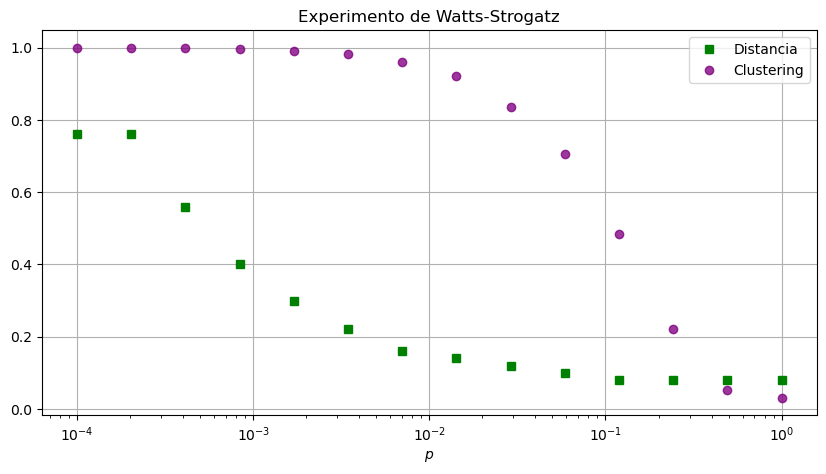

In [38]:
plt.figure(figsize=[10,5])
plt.grid()
plt.title("Experimento de Watts-Strogatz")

plt.plot(x, Diam, 's', label = "Distancia", color = 'green')
plt.plot(x, Clus, 'o', label = "Clustering", alpha = .78, color ="purple")
plt.xlabel(r"$p$")
plt.xscale("log")
plt.legend()
plt.savefig('Watts_Strogatz', dpi = 200)

In [6]:
import numpy as np

k = 14 # numero de cambio de enlaces
for i in np.logspace(np.log10(0.0001), np.log10(1), k):
    print(i)

0.0001
0.0002030917620904735
0.0004124626382901352
0.0008376776400682924
0.0017012542798525892
0.003455107294592218
0.00701703828670383
0.014251026703029992
0.028942661247167517
0.05878016072274912
0.1193776641714437
0.24244620170823308
0.49238826317067413
1.0
